## **<ins><center>IRM TUTORIAL</center></ins>**

This notebook provides a basic overview and information on how to plot the CASSIOPE IRM Sensor Surface Current (SSC) HDF5 files as a function of time. 

### <ins>Table of Contents</ins>

* [About IRM](#about-irm)
* [Prerequisites](#prerequisites)
* [How the IRM SSC zip files are stored](#how-the-irm-ssc-zip-files-are-stored)
* [Tutorials](#tutorials)
    1. [Reading IRM SSC Zip files](#reading-irm-level-1-zip-files)
    2. [Reading the datasets of H5 file](#reading-the-datasets-of-h5-files)
        * [Alternative way of reading the datasets](#alternative-way-of-reading-the-datasets)
    3. [Plotting Sensor Surface Current as a function of time](#plotting-sensor-surface-current-as-a-function-of-time)

<a id="about-irm"></a>

### <ins>About IRM</ins>

&emsp; The imaging and rapid-scanning ion mass spectrometer (IRM) is part of the Enhanced Polar Outflow Probe (e-POP) instrument suite on the Canadian CASSIOPE small satellite. IRM is designed to measure the composition and detailed velocity disctributions of ions in the ~ 1-100 eV/q range on a non-spinning spacecraft, the IRM sensor consists of a planar entrance aperture, a pair of electrostatic deflectors, a time-of-flight (TOF) gate, a hemispherical electrostatic analyzer, and a micro-channel plate (MCF) detector.  

You can find the open-access paper __[here](https://link.springer.com/article/10.1007/s11214-015-0149-8)__

There are two data streams delivered by the IRM instrument. The first is the detailed ion data consisting of energy pixel and time-of-arrival bin number for each arriving ion, while the second data stream is the IRM sensor surface current (SSC).
The IRM SSC is a measure of the net current on the outer skin surface of the IRM instrument head. Positive values indicate a net positive current flux on the surface (e.g. ions impinging or electrons leaving).
The cylindrical head of IRM has a length of 132 mm and a diameter of 92 mm and is mounted on a 1-meter boom that is pointed in the -Y direction on the spacecraft (see image below).

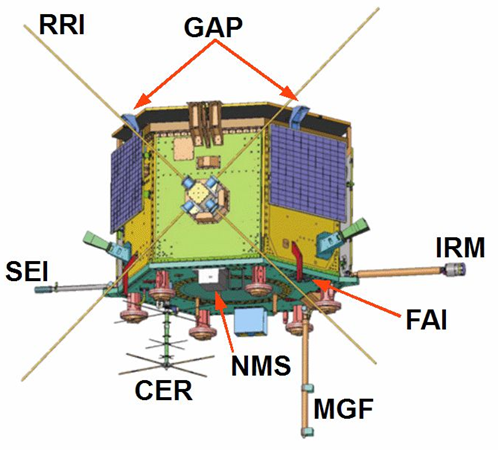

In [4]:
from IPython.display import display, Image
display(Image(filename="sat_image.png", height=504, width=463))

<a id="prerequisites"></a>

### <ins>Prerequisites</ins>

1. This tutorial assumes you have some basic understanding of Python and its terminology. For this tutorial we are using Python version 3.10.4.

2. You will be required to install the following libraries in your python environment:
    *  __[h5py](https://docs.h5py.org/en/stable/build.html)__
    *  __[matplotlib](https://matplotlib.org/stable/users/installing/index.html)__
    *  __[numpy](https://numpy.org/install/)__

<a id="how-the-irm-ssc-zip-files-are-stored"></a>

### <ins>How the IRM SSC zip files are stored</ins>

&emsp; IRM SSC files are stored in zip format and downloaded from either __[e-POP website](https://epop-data.phys.ucalgary.ca/)__ or __[eDEx website](https://edex.phys.ucalgary.ca/)__. The zip file contains a single H5 file and within the H5 files you can find the following two datasets:

* IRM Data: directly relating to the IRM SSC data
* Satellite Data: relating to CASSIOPE location and attitude data

You can read more about the attributes of each dataset __[here](https://epop.phys.ucalgary.ca/data-handbook/irm-sensor-surface-current-ssc-hdf5-file/)__

For this tutorial, we will be working with IRM data's *data_utc_string* and *sensor_surface_current* attributes. For each entry of *data_utc_string* we can have multiple values of *sensor_surface_current*, this is done to reduce the file size as it is unnecessary to have each SSC value timestamped in the file. 

<a id="tutorials"></a>

## **<ins><center>Tutorials</center></ins>**

<a id="reading-irm-level-1-zip-files"></a>

#### <ins>Reading IRM SSC Zip Files</ins>

For this illustration, we will use the zip file from 1<sup>st</sup> February 2017 created from 09:47:28 to 10:18:25 UTC. If you plan on using the same file, you may download it from __[here](https://epop-data.phys.ucalgary.ca/2017/02/01/IRM/IRM_20170201_094728_101825_SSC_1.1.0.h5.zip)__, although the process would be the same for any other zip file. 

Now, with the zip file on your local machine, you can use the following code to extract all the h5 files into your current working folder under the same name.

In [1]:
import zipfile          #to extract zipfiles
import os               #create new directory to store extracted files


"""
name of the zip file 
if your zip file is stored somewhere else other than your current working directory,
then copy paste the entire path to the zip file with the name and .zip extension""" 
filename = "IRM_20170201_094728_101825_SSC_1.1.0.h5.zip"  


"""
name of the folder where the files would be stored
if you would like the extracted folder to be somewhere other than your
current working directory, then paste the entire address to the 
folder_name object below"""
folder_name = "temp"


"""NOTE -> if the folder with the same name already exists and you 
    try executing the following you would end up having an error
    so, you would either need to delete the pre existing folder, 
    change the name of the folder or comment the following line"""
#if the folder does not exist the following line would create a folder 
#with folder_name as the name
os.mkdir(folder_name)


"""the following two lines of code would first open the Zipfile 
as file in read mode ("r") and the file.extractall function 
would extract the contents of the file to the specified folder
if you would like to extract all the files to the current working directory 
then change file.extractall(path=folder_name) to file.extractall()"""
with zipfile.ZipFile(filename, "r") as file:
    file.extractall(path=folder_name)

&emsp; The goal for the above code is to extract one zipfile into a folder with the same name. We first import the two necessary modules os and zipfile. Then we mention the name of the file along with the name of the folder which would contain the extracted files from the zipfiles. We use the same name for the folder but you can change the name of the folder to whatever you like. Then with the builtin ZipFile function of the zipfile module we extract all the h5 files into the created folder.

<a id="reading-the-datasets-of-h5-files"></a>

### <ins>Reading the datasets of H5 files</ins>

&emsp; As mentioned in the previous section the SSC h5 file contains two datasets, one for IRM data and the other for satellite data. The following snippet of code will describe how to check for the available datasets within a h5 file. 

In [2]:
import h5py             #for opening h5 file

#path to the h5 file 
path_to_h5_file = "temp/IRM_20170201_094728_101825_SSC_1.1.0.h5"

#the following block of code would open the h5 file in read mode ("r")
#As h5 files work like python dictionary, we
#display the keys using file.keys()
with h5py.File(path_to_h5_file, "r") as file:
    print(file.keys())

<KeysViewHDF5 ['IRM Data', 'Satellite Data']>


For our purposes we need to be concerned with the IRM Dataset as it contains information about the utc datetime and SSC values. The following block of code demonstrates how the values from *data_utc_string* and *senor_surface_current* can be stored into lists.  

In [3]:
import h5py             #for working with h5 files
import datetime         #for converting to datetime objects

#filename 
h5_file_name = "temp/IRM_20170201_094728_101825_SSC_1.1.0.h5"

#opening h5 file as IRM_file
with h5py.File(h5_file_name, "r") as IRM_file:
    #converting values from data_utc_string to datetime objects and storing in a list
    utc_list = [datetime.datetime.strptime(x.decode('UTF-8'), '%Y-%m-%dT%H:%M:%S.%fZ')
         for x in IRM_file['IRM Data']['data_utc_string']]
    
    #transferring all values from sensor_surface_current to ssc_data
    ssc_data = [x for x in IRM_file["IRM Data"]["sensor_surface_current"]]

#printing the first five values from utc_list and ssc_data
for x in range(5):
    print("Datetime: {} SSC: {}"
          .format(utc_list[x].strftime("%Y-%m-%d_%H:%M:%S.%f"), ssc_data[x]))
    

Datetime: 2017-02-01_09:47:28.983410 SSC: [-0.229885 -0.234768 -0.244534 -0.249417 -0.249417 -0.244534 -0.225002
 -0.225002 -0.239651 -0.2543   -0.244534]
Datetime: 2017-02-01_09:47:28.994590 SSC: [-0.244534 -0.244534 -0.229885 -0.239651 -0.244534 -0.239651 -0.229885
 -0.220119 -0.234768 -0.244534]
Datetime: 2017-02-01_09:47:29.003400 SSC: [-0.244534 -0.249417 -0.244534 -0.229885 -0.225002 -0.229885 -0.239651
 -0.244534 -0.229885 -0.220119 -0.229885]
Datetime: 2017-02-01_09:47:29.014570 SSC: [-0.229885 -0.244534 -0.239651 -0.225002 -0.225002 -0.239651 -0.244534
 -0.273832 -0.229885 -0.215236]
Datetime: 2017-02-01_09:47:29.023380 SSC: [-0.215236 -0.229885 -0.244534 -0.239651 -0.229885 -0.220119 -0.234768
 -0.244534 -0.239651 -0.229885 -0.220119]


As you can see from the output of the above code that for one value of utc we have ten or eleven values of SSC, this is done to minimize the file size and before plotting we would need to correct that.

To fix the datetime issue we can create more datetime objects which would each increase by a thousand microseconds with each increment. The following code shows how to do the same. 

In [4]:
import h5py             #for working with h5 files
import datetime         #for converting to datetime objects

#filename 
h5_file_name = "temp/IRM_20170201_094728_101825_SSC_1.1.0.h5"

#opening h5 file as IRM_file
with h5py.File(h5_file_name, "r") as IRM_file:
    #converting values from data_utc_string to datetime objects and storing in a list
    utc_list = [datetime.datetime.strptime(x.decode('UTF-8'), '%Y-%m-%dT%H:%M:%S.%fZ')
         for x in IRM_file['IRM Data']['data_utc_string']]
    
    #transferring all values from sensor_surface_current to ssc_data
    ssc_data = [x for x in IRM_file["IRM Data"]["sensor_surface_current"]]

#empty list to store tuple of datetime and ssc
data = []                                                       
#assuming high resolution data is 1000 Hz
FREQ = 1000                                                     

#this loop would over each value of utc and generate increments of the original 
#datetime value by adding "FREQ" microsecond values 
for x in range(len(utc_list)):
    #current value of utc
    utc = utc_list[x]                                           
    #all the values of ssc from one element 
    ssc = ssc_data[x]                                           

    #this loop would go over each value in ssc and 
    #generate a value of datetime accordingly
    for y in range(len(ssc)):
        offset = y                                              
        data.append((utc + datetime.timedelta(microseconds=(offset*FREQ)),
                     ssc[y]))

#printing the first 15 values from data list 
for x in range(15):
    print("Datetime: {} SSC: {}".format(data[x][0], data[x][1]))

Datetime: 2017-02-01 09:47:28.983410 SSC: -0.22988499701023102
Datetime: 2017-02-01 09:47:28.984410 SSC: -0.23476800322532654
Datetime: 2017-02-01 09:47:28.985410 SSC: -0.24453400075435638
Datetime: 2017-02-01 09:47:28.986410 SSC: -0.2494170069694519
Datetime: 2017-02-01 09:47:28.987410 SSC: -0.2494170069694519
Datetime: 2017-02-01 09:47:28.988410 SSC: -0.24453400075435638
Datetime: 2017-02-01 09:47:28.989410 SSC: -0.2250020056962967
Datetime: 2017-02-01 09:47:28.990410 SSC: -0.2250020056962967
Datetime: 2017-02-01 09:47:28.991410 SSC: -0.23965099453926086
Datetime: 2017-02-01 09:47:28.992410 SSC: -0.25429999828338623
Datetime: 2017-02-01 09:47:28.993410 SSC: -0.24453400075435638
Datetime: 2017-02-01 09:47:28.994590 SSC: -0.24453400075435638
Datetime: 2017-02-01 09:47:28.995590 SSC: -0.24453400075435638
Datetime: 2017-02-01 09:47:28.996590 SSC: -0.22988499701023102
Datetime: 2017-02-01 09:47:28.997590 SSC: -0.23965099453926086


In the above code, we first transfer all the data from *data_utc_string* to *utc_list* as datetime objects and transfer the *sensor_surface_current* dataset to *ssc_data*. As mentioned before, for one value of datetime object we have multiple values of sensor surface current, so to fix that we run another for loop and assume that the high resolution data is 1000 Hz meaning that we would add a thousand microseconds to the original datetime object for each value of sensor surface current. The end result would be a one-to-one mapping for all SSC values with a datetime object. 

<a id="alternative-way-of-reading-the-datasets"></a>

#### Alternative way of reading the datasets

Following is an alternative way of reading and storing *data_utc_string* and *sensor_surface_current* using numpy.

In [5]:
import h5py             #for working with h5 files                        
import datetime         #for working with datetime objects
import numpy as np      #for converting datasets to arrays
import warnings         #to remove deprecation warning 

warnings.filterwarnings("ignore", category=DeprecationWarning)

#name of the file to be opened
h5_file_name = "temp/IRM_20170201_094728_101825_SSC_1.1.0.h5"

#opening h5 file
file = h5py.File(h5_file_name, "r")                             

#array of utc datetimes 
utc_list = np.array([datetime.datetime.strptime(x.decode('UTF-8'),
                                                 '%Y-%m-%dT%H:%M:%S.%fZ') 
                     for x in file['IRM Data']['data_utc_string']])
#array of ssc dataset
ssc_dataset = np.array(file["IRM Data"]["sensor_surface_current"])

#converting the two arrays into a list of tuples 
#and adding the offset values for datetime 
data = [(utc + datetime.timedelta(microseconds=(offset * 1000)), ssc) 
        for utc, ssc_list in zip(utc_list, ssc_dataset)
        for offset, ssc in enumerate(ssc_list)]

#printing the first 15 values from data
for x in range(15):
    print("Datetime: {} SSC: {}".format(data[x][0], data[x][1]))

Datetime: 2017-02-01 09:47:28.983410 SSC: -0.22988499701023102
Datetime: 2017-02-01 09:47:28.984410 SSC: -0.23476800322532654
Datetime: 2017-02-01 09:47:28.985410 SSC: -0.24453400075435638
Datetime: 2017-02-01 09:47:28.986410 SSC: -0.2494170069694519
Datetime: 2017-02-01 09:47:28.987410 SSC: -0.2494170069694519
Datetime: 2017-02-01 09:47:28.988410 SSC: -0.24453400075435638
Datetime: 2017-02-01 09:47:28.989410 SSC: -0.2250020056962967
Datetime: 2017-02-01 09:47:28.990410 SSC: -0.2250020056962967
Datetime: 2017-02-01 09:47:28.991410 SSC: -0.23965099453926086
Datetime: 2017-02-01 09:47:28.992410 SSC: -0.25429999828338623
Datetime: 2017-02-01 09:47:28.993410 SSC: -0.24453400075435638
Datetime: 2017-02-01 09:47:28.994590 SSC: -0.24453400075435638
Datetime: 2017-02-01 09:47:28.995590 SSC: -0.24453400075435638
Datetime: 2017-02-01 09:47:28.996590 SSC: -0.22988499701023102
Datetime: 2017-02-01 09:47:28.997590 SSC: -0.23965099453926086


<a id="plotting-sensor-surface-current-as-a-function-of-time"></a>

### <ins>Plotting Sensor Surface Current as a function of time</ins>

Now, that we have a way to store the values of SSC and time in a list, we can easily plot them on a graph. 

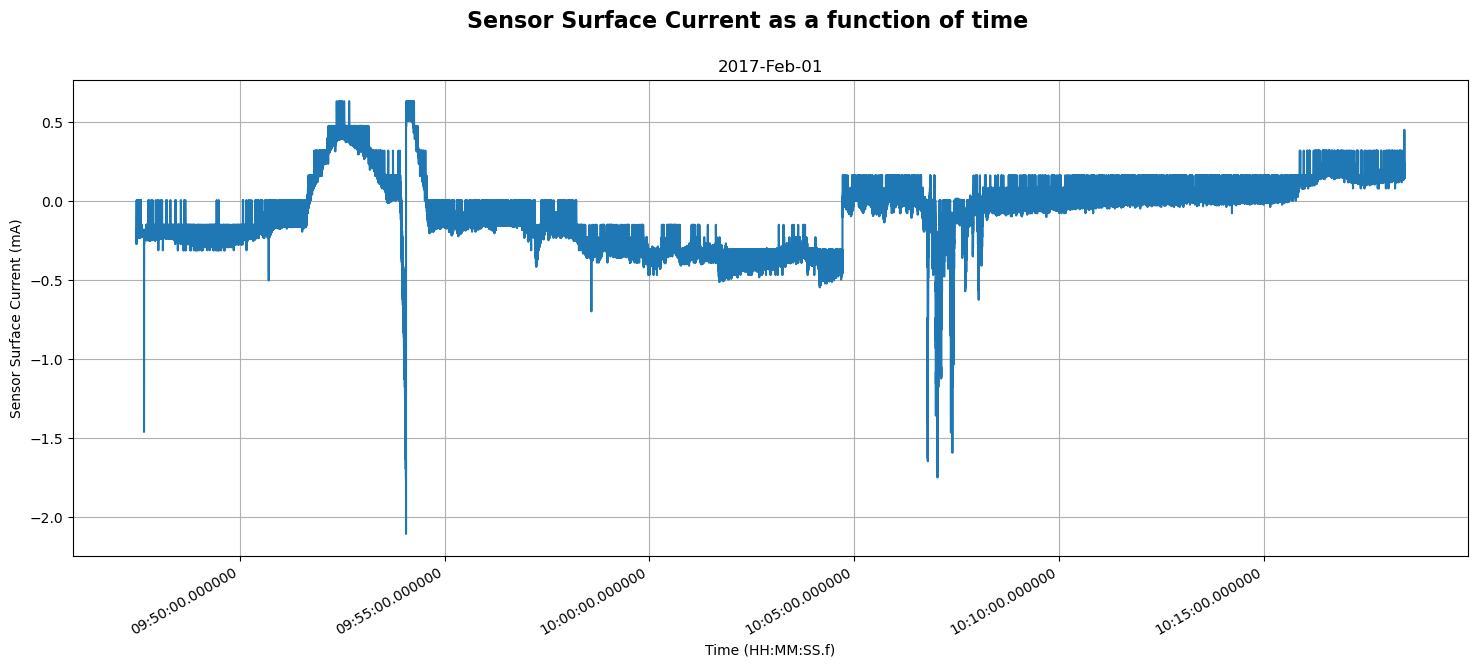

In [6]:
import h5py                             #for working with h5 files                        
import datetime                         #for working with datetime objects
import numpy as np                      #for converting datasets to arrays
import matplotlib.pyplot as plt         #for plotting the graph
import matplotlib.dates as mdates       #for displaying dates on the xaxis
import warnings                         #to remove deprecation warning

warnings.filterwarnings("ignore", category=DeprecationWarning)

#name of the file to be opened
h5_file_name = "temp/IRM_20170201_094728_101825_SSC_1.1.0.h5"

#opening h5 file
file = h5py.File(h5_file_name, "r")                             

#array of utc datetimes 
utc_list = np.array([datetime.datetime.strptime(x.decode('UTF-8'),
                                                 '%Y-%m-%dT%H:%M:%S.%fZ') 
                     for x in file['IRM Data']['data_utc_string']])
#array of ssc dataset
ssc_dataset = np.array(file["IRM Data"]["sensor_surface_current"])

#converting the two arrays into a list of tuples 
#and adding the offset values for datetime 
data = [(utc + datetime.timedelta(microseconds=(offset * 1000)), ssc) 
        for utc, ssc_list in zip(utc_list, ssc_dataset) 
        for offset, ssc in enumerate(ssc_list)]

#converting the tuples into a list for easier plotting on the graph
utc_list = [x for x, _ in data]
ssc_list = [y for _, y in data]

#plotting the graph 

#size of the figure
plt.figure(figsize=(18,7))                                      
#plotting ssc vs time 
plt.plot(utc_list, ssc_list)                                    
#title of the graph 
plt.suptitle("Sensor Surface Current as a function of time", 
             fontsize =16, fontweight="bold")   
#subtitle displaying the date 
plt.title("{}".format(utc_list[0].date().strftime("%Y-%b-%d"))) 
#x-axis label
plt.xlabel("Time (HH:MM:SS.f)")                                 
#y-axis label
plt.ylabel("Sensor Surface Current (uA)")                       

#autoformatting the date on x axis
plt.gcf().autofmt_xdate()                                       
#the format in which the dates will be displayed
myfmt = mdates.DateFormatter("%H:%M:%S.%f")                     
#setting the format on plot
plt.gca().xaxis.set_major_formatter(myfmt)                      

#setting grid on the plot
plt.grid()                                                      
#displaying the plot on screen
plt.show()                                                      

The above code essentially adds on to what was done in the previous sections by displaying a plot of sensor surface current as a function of time. Since there are a lot of data points present you may need to adjust the plot sizes and fonts according to your needs. 